### Action item:
SEMPRE I RAPPORTI
1. fit legge in l a tau fisso per captare la dipendenza in l (t fiduciale, quello dell'ultimo paper di planck pag 19) (0 <l < 30 o 50)
2. fit legge in t a l del picco (circa l=5,6,7,8)
3. plot f(l)*g(t) 
4. dare più dati (affinare t) e cercare un'espressione unica c_ee(l,t) per l anche più grande di 50
5. cercare una smooth transition function in l che passi dal regime t^2 a e^(-2t) (magari dopo)

Farlo per EE , poi per TE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [2]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage

In [3]:
model = PySRRegressor()

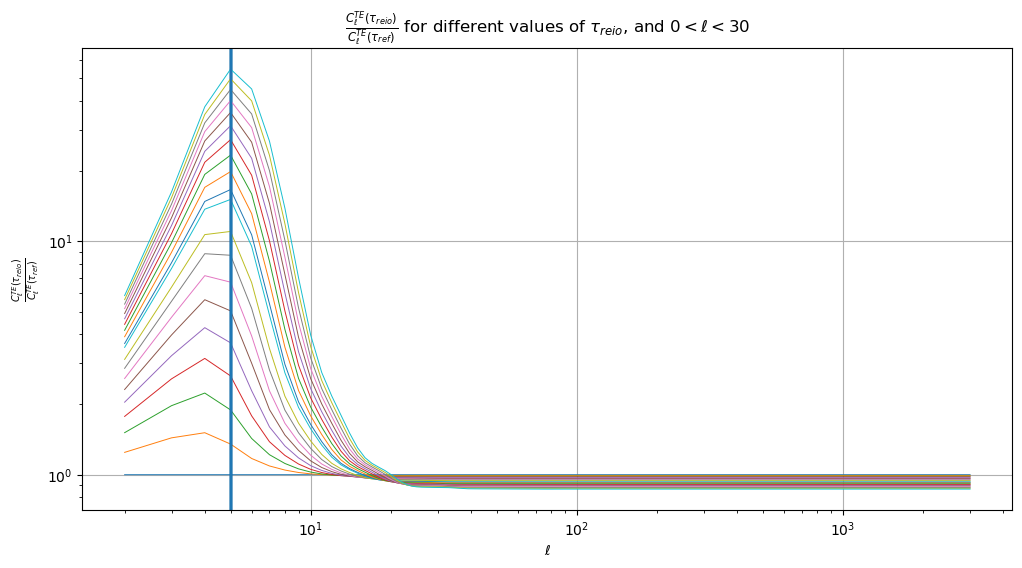

In [4]:
cl_raw = pd.read_csv('CL_20_2.csv')
tau_real = 0.0561
t_reio = np.round(np.linspace(0.0561-5*0.0071, 0.0561+5*0.0071, 20, endpoint=True),4)
index = np.abs(t_reio - tau_real).argmin()
t_reio[index] = tau_real
cl_ref = cl_raw[(cl_raw['tau'] == np.min(cl_raw['tau']))]

ell = cl_raw['ell'].values
ee = cl_raw['EE'].values
te = cl_raw['TE'].values
tt = cl_raw['TT'].values
tau = cl_raw['tau'].values

a = len(t_reio)
b = len(ell)
alpha = int(b/a)

plt.figure(figsize=(12, 6))
#plt.xlim([30,3000])
#plt.ylim([0.5,3])
for i in range (a):
    l = ell[(i * alpha):(i + 1)*alpha]
    y = ee[(i * alpha):(i + 1)*alpha]/(cl_ref['EE'][0:alpha])
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 4))
    plt.loglog(l,y, label=string, lw=0.7)
    plt.axvline(5)
    #plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(\tau_{ref})}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(\tau_{ref})}$ for different values of $\tau_{reio}$, and $0<\ell<30}$')
plt.grid(True)
plt.show()  

In [5]:
cl_raw = pd.read_csv('CL_20_50_2.csv')
tau_real = 0.0561
t_reio = np.round(np.linspace(0.0561-5*0.0071, 0.0561+5*0.0071, 20, endpoint=True),4)
index = np.abs(t_reio - tau_real).argmin()
t_reio[index] = tau_real
cl_ref = cl_raw[(cl_raw['tau'] == np.min(cl_raw['tau']))]

ell = cl_raw['ell'].values
ee = cl_raw['EE'].values
te = cl_raw['TE'].values
tt = cl_raw['TT'].values
tau = cl_raw['tau'].values

a = len(t_reio)
b = len(ell)
alpha = int(b/a)

### we choose $\tau_{ref}=\tau_{min}=0.0261$

Mod 02/10/23 : diviso e^-2t

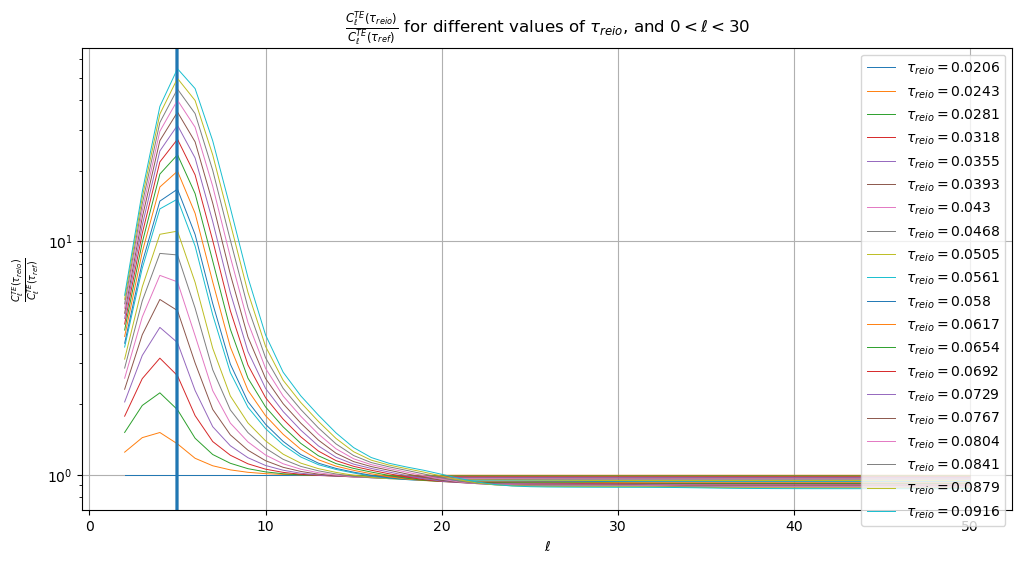

In [6]:
plt.figure(figsize=(12, 6))
ee_ratio = []
for i in range (a):
    l = ell[(i * alpha):(i + 1)*alpha]
    #y = np.exp(-2*tau[0:alpha])*ee[(i * alpha):(i + 1)*alpha]/(cl_ref['EE'][0:alpha]*np.exp(-2*tau[(i * alpha):(i + 1)*alpha]))
    y = ee[(i * alpha):(i + 1)*alpha]/(cl_ref['EE'][0:alpha])
    ee_ratio.append(y)
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 4))
    plt.semilogy(l,y, label=string, lw=0.7)
    plt.axvline(5)
    plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(\tau_{ref})}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(\tau_{ref})}$ for different values of $\tau_{reio}$, and $0<\ell<30}$')
plt.grid(True)
plt.show()  

In [ ]:
import os
notebook_folder = os.path.dirname('')
data_folder = os.path.join(notebook_folder, "..", "Data")
def data_path(dat_id):
    return os.path.join(data_folder, dat_id)
def save_file(dat_id,df):
    df.to_csv(data_path(dat_id), index=False)

In [7]:
l = ell[0:alpha]
ratio_used = ee_ratio[19]
Cl = pd.DataFrame({'ell':l,'EE/EE_ref':ratio_used})
save_file('FINALE-ELL-DIV-E.csv',Cl)

we sort the arrays to use $\tau$ as variable and $\ell$ fixed

In [8]:
ratio_arr = np.concatenate(ee_ratio)
x_t = []
x_l = []
y_ratio = []

for i in range (alpha):
    for j in range (a):
        index = int(i+j*alpha)
        x_t.append(tau[index])
        x_l.append(ell[index])
        y_ratio.append(ratio_arr[index]) 

In [9]:
df = pd.DataFrame({'tau':x_t,'ell':x_l, 'EE/EE_ref':y_ratio})
cl_sort = df[(df['ell'] == 5)]
save_file('FINALE-L5-TAU-DIV-E.csv',cl_sort)

----
## Graphs for $f(\ell)$
----

1) dati non centrati su planck(dividendo per e^-2t): hall_of_fame_2023-10-02_111602.692.pkl
$$f(\ell) = e^{1.63 \cdot 0.672^{\ell} \ell \left(\ell - 1.06\right)} + \frac{3.04}{\ell - 1.07}$$



2) dati centrati su planck(non dividendo per e^-2t): hall_of_fame_2023-10-10_112120.907.pkl, hall_of_fame_2023-10-10_115205.262.pkl
$$f(\ell) = 0.545 e^{0.597^{\ell} \ell^{2.54}} + \frac{1.19}{\log{\left(\ell \right)}}$$
3) dati centrati su planck( dividendo per e^-2t):hall_of_fame_2023-10-10_114129.232.pkl
$$f(\ell) = 0.880^{\ell} + e^{0.669 \cdot 0.547^{\ell} \ell^{3}}$$

In [10]:
import custom_rcparams
import os

In [ ]:
notebook_folder = os.path.dirname('')
images_folder = os.path.join(notebook_folder, "..", "Images")
def img_path(img_id):
    return os.path.join(images_folder, img_id)
def save_img(img_id):
    plt.savefig(img_path(img_id) + ".pdf", format='pdf', bbox_inches='tight')

Checking if hall_of_fame_2023-10-10_115205.262.pkl exists...
Loading model from hall_of_fame_2023-10-10_115205.262.pkl
e^{\frac{\ell}{0.324 \cdot 1.39^{\ell} - 0.324 \ell + 1.16}} - 0.124
The accuracy of this model is 98.25


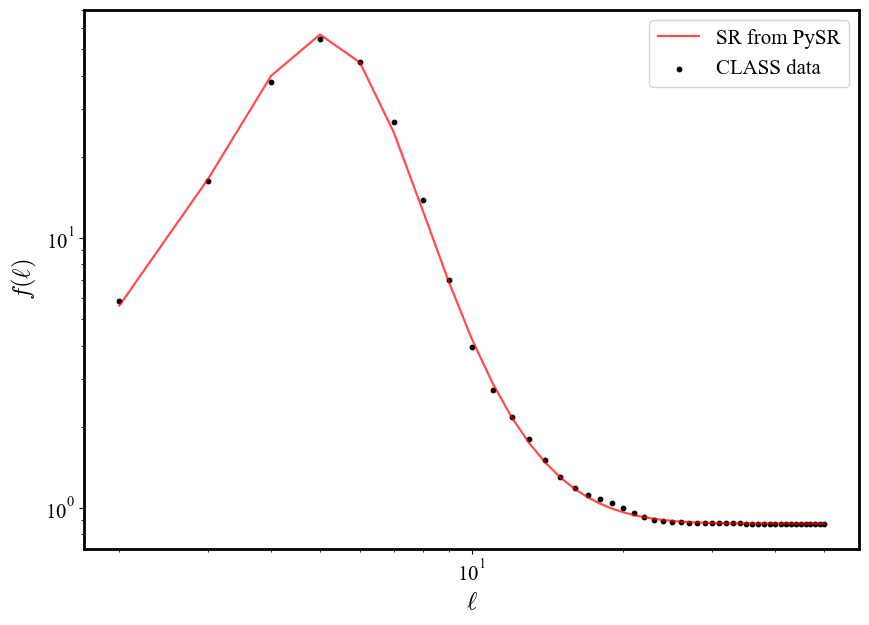

In [19]:
mod = model.from_file('hall_of_fame_2023-10-10_115205.262.pkl') #previous:ratio-ell-ee-1509.pkl
l = l.reshape(-1,1)
ratio_used = np.array(ratio_used)
print(mod.latex())
print('The accuracy of this model is', round(accuracy(ratio_used,mod.predict(l)),2))

plt.loglog(l,mod.predict(l), label='SR from PySR',color='r',alpha=0.7)
plt.scatter(l,ratio_used, label='CLASS data', s=10, color='k')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$f(\ell)$')
plt.legend()
save_img('SEPVAR1')

----
## Graphs for $g(\tau)$
----

1) dati non centrati su planck(togliendo e^-2t): hall_of_fame_2023-10-02_112606.600.pkl
$$g(\tau) = \tau \left(5.97 \cdot 10^{4} \tau^{2} - 76.1\right) + 1.97$$


2) dati centrati su planck (senza tolgliere e^-2t): hall_of_fame_2023-10-06_085118.328.pkl
$$8.05 \cdot 10^{4} \tau^{2} \left(\tau - 0.0235\right) + 1.11$$
2) dati centrati su planck (togliendo e^-2t): hall_of_fame_2023-10-06_085509.223.pkl, hall_of_fame_2023-10-06_085803.146.pkl
$$ 9.48 \cdot 10^{4} \tau^{2} \left(\tau - 0.0261\right) + 1.26 $$

Checking if hall_of_fame_2023-10-06_085118.328.pkl exists...
Loading model from hall_of_fame_2023-10-06_085118.328.pkl
8.05 \cdot 10^{4} \tau^{2} \left(\tau - 0.0235\right) + 1.11
The accuracy of this model is 98.2


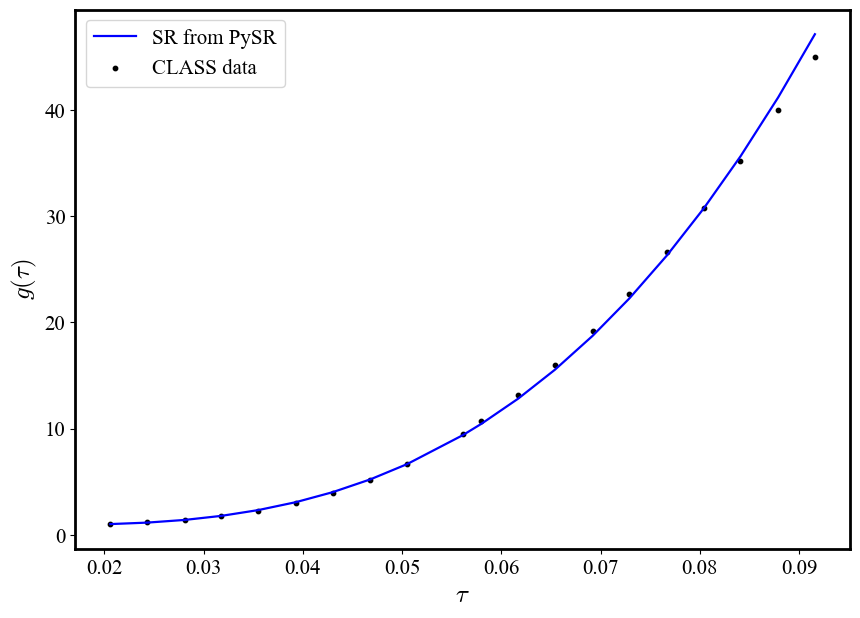

In [20]:
mod2 = model.from_file('hall_of_fame_2023-10-06_085118.328.pkl') #previous: ratio-tau-ee-1509.pkl
print(mod2.latex())
t = t_reio.reshape(-1,1)
ratio_tau = np.array(df[(df['ell'] == 6)]['EE/EE_ref'])
print('The accuracy of this model is', np.round(accuracy(ratio_tau,mod2.predict(t)),2))

plt.plot(t_reio,mod2.predict(t),color='blue', label='SR from PySR')
plt.scatter(t_reio,ratio_tau, label='CLASS data', s=10, color='k')

plt.xlabel(r'$\tau$')
plt.ylabel(r'$g(\tau)$')
plt.legend()
save_img('SEPVAR2')

### defining $\mathcal{F}(\ell,\tau):= \mathcal{N}h(\ell,\tau) = \mathcal{N}f(\ell)g(\tau)$

In [13]:
def h(ell,tau):
    f =0.888 * np.exp(l**1.16 * np.sin(np.tanh(6.51 * 0.665**l))) # non centrato, senza togliere e^-2t: np.exp(1.63 * 0.672 ** ell * ell * (ell - 1.06)) + 3.04 / (ell - 1.07)
    g = 8.05 * 10**4 * tau**2 * (tau - 0.0235) + 1.11# non centrato, senza togler e^-2t tau * (5.97e4 * tau**2 - 76.1) + 1.97
    pr = f * g
    return pr

In [14]:
norm_ga = []

for i in range (a):
    z = np.max((ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha]))*h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha])/np.max(h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha]))
    norm_ga.append(z)
F_ga = np.concatenate(norm_ga)

old one: 
def h(ell,tau):
    f = 0.105 * np.exp(1.42 * 0.711**ell * ell**2) + 0.439 + 8.28 / ell
    g = (-8.54e3 * tau**2 * (tau + 0.383)) + (1.33e4 * tau * (tau - 0.0430)) + 9.56
    pr = f * g
    return pr

norm_ga = []

for i in range (a):
    z = np.max((ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha]))*h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha])/np.max(h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha]))
    norm_ga.append(z)
F_ga = np.concatenate(norm_ga)

#### $$\mathcal{F}(\ell,\tau) := \mathcal{N}f(\ell)\cdot g(\tau) = \mathcal{N}(0.105 e^{1.42 \cdot 0.711^{\ell} \ell^{2}} + 0.439 + \frac{8.28}{\ell})\cdot(- 8.54 \cdot 10^{3} \tau^{2} \left(\tau + 0.383\right) + 1.33 \cdot 10^{4} \tau \left(\tau - 0.0430\right) + 9.56)$$

ValueError: x and y must be the same size

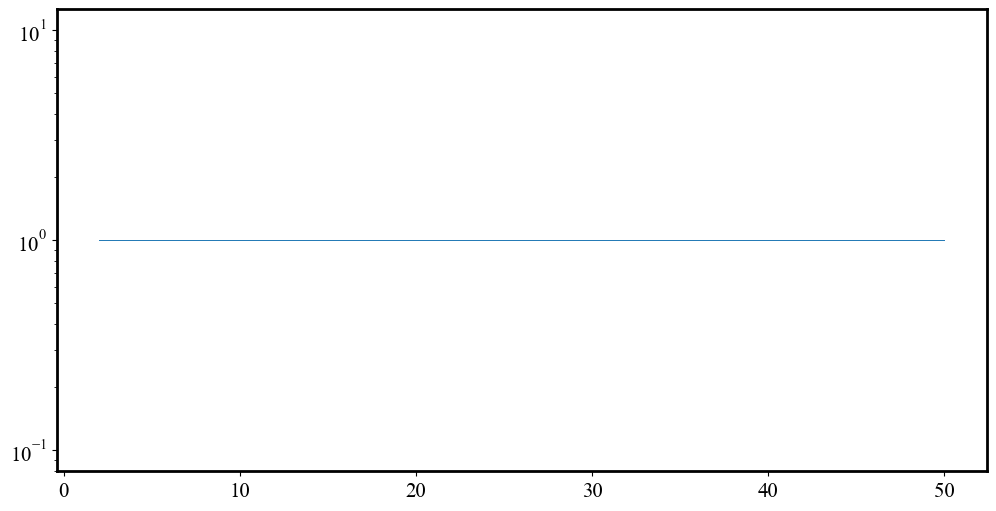

In [15]:
plt.figure(figsize=(12, 6))
norm_surf = []
for j in range (20):
    i = j
    l = ell[(i * alpha):(i + 1)*alpha]
    y = (ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha])
    z = F_ga[(i * alpha):(i + 1)*alpha]
    norm_surf.append(z)
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 4)) + 'CLASS'
    string2 = r'$\tau_{reio}=$' + str(round(t_reio[i], 4)) + 'PySR'
    plt.semilogy(l,y, label=string, lw=0.7)
    plt.scatter(l,z, label=string2, s=1)
    plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(\tau_{ref})}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(\tau_{ref})}$ for different values of $\tau_{reio}$, and $0<\ell<50}$')
plt.grid(True)
plt.show() 